In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Abun_SiII_S1.csv')
data.head()

,Element,Ion,Lambda,Vr,Vr_err,Vsini,Vsini_err,Abun,Abun_err,Chi_sq,Tau5000,Energy
0,14.0,1.0,3853.6645,-87.9471,0.0081,4.9041,0.4465,-5.3829,0.0173,0.05670,-4.1305,55309.35
1,14.0,1.0,3856.0175,-89.0275,0.0118,8.9149,0.1821,-5.3795,0.0350,0.10302,-5.2345,55325.18
2,14.0,1.0,3862.5954,-88.8108,0.0024,7.3906,0.0491,-5.0690,0.0082,6.25148,-4.7976,55309.35
3,14.0,1.0,4128.0536,-83.6311,0.0054,9.0886,0.0485,-3.8829,0.0082,0.24275,-3.0023,79338.50
4,14.0,1.0,4130.8715,-88.1133,0.0030,8.5885,0.0679,-4.8047,0.0046,0.89811,-1.4054,79355.02


In [3]:
data.describe()

,Element,Ion,Lambda,Vr,Vr_err,Vsini,Vsini_err,Abun,Abun_err,Chi_sq,Tau5000,Energy
count,12.0,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,14.0,1.0,4851.914542,-88.334450,0.003642,8.872825,0.083725,-4.437017,0.007917,3.309929,-3.313217,73309.199167
std,0.0,0.0,990.886038,2.004177,0.003260,1.976218,0.123134,0.937270,0.009693,4.442898,1.457115,14010.266347
min,14.0,1.0,3853.664500,-92.195000,0.001100,4.904100,0.006800,-5.382900,0.000700,0.056700,-5.234500,55309.350000
25%,14.0,1.0,4061.689050,-88.864975,0.001600,8.289025,0.028475,-4.911125,0.001700,0.734270,-4.631700,62956.647500
50%,14.0,1.0,4585.958750,-88.116650,0.002400,8.907500,0.043300,-4.754300,0.004600,1.352325,-3.115750,79346.760000
75%,14.0,1.0,5594.577925,-87.992550,0.003600,10.362025,0.067900,-4.244400,0.008200,4.607062,-2.547200,81206.335000
max,14.0,1.0,6371.371400,-83.631100,0.011800,11.698100,0.446500,-2.109700,0.035000,15.759940,-0.488400,101023.050000


In [4]:
mag = pd.read_csv("Abun_SiII_S1_magnetic.csv")
mag.head()

,Element,Ion,Lambda,Vr,Vr_err,Vsini,Vsini_err,Abun,Abun_err,Chi_sq,Tau5000,Energy
0,14.0,1.0,3853.6645,-88.1526,0.0128,0.5874,2.2687,-5.3954,0.0245,0.26780,-4.1305,55309.35
1,14.0,1.0,3856.0175,-88.6234,0.0194,6.7321,0.3557,-5.6082,0.0465,0.24738,-5.2345,55325.18
2,14.0,1.0,3862.5954,-88.7949,0.0042,6.3991,0.0751,-5.1595,0.0127,5.54524,-4.7976,55309.35
3,14.0,1.0,4128.0536,-83.6970,0.0085,8.3887,0.0825,-3.9729,0.0132,1.01076,-3.0023,79338.50
4,14.0,1.0,4130.8715,-88.1535,0.0063,8.4863,0.0702,-4.8486,0.0076,8.82547,-1.4054,79355.02


In [5]:
mag.describe()

,Element,Ion,Lambda,Vr,Vr_err,Vsini,Vsini_err,Abun,Abun_err,Chi_sq,Tau5000,Energy
count,11.0,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,14.0,1.0,4917.461891,-88.593273,0.006364,7.941300,0.282445,-4.459564,0.011591,15.475772,-3.320855,72759.574545
std,0.0,0.0,1011.596485,2.421803,0.005343,3.510686,0.665782,1.083992,0.013451,24.104227,1.527983,14557.766016
min,14.0,1.0,3853.664500,-93.862400,0.002100,0.587400,0.000000,-5.608200,0.001100,0.247380,-5.234500,55309.350000
25%,14.0,1.0,3995.324500,-88.825250,0.003050,6.965250,0.033700,-5.128700,0.002850,0.899395,-4.687000,60412.825000
50%,14.0,1.0,5041.023800,-88.623400,0.004000,8.105200,0.070200,-4.848600,0.007600,4.897690,-3.002300,79338.500000
75%,14.0,1.0,5722.695150,-88.072650,0.007400,8.762250,0.099950,-4.166700,0.012950,16.815985,-2.547200,81221.330000
max,14.0,1.0,6371.371400,-83.697000,0.019400,15.726700,2.268700,-2.031900,0.046500,70.641000,-0.488400,101023.000000


In [6]:
merged_df = pd.merge(data, mag, on=["Element", "Ion", "Lambda"], suffixes=('', '_mag'))
merged_df.head()

,Element,Ion,Lambda,Vr,Vr_err,Vsini,Vsini_err,Abun,Abun_err,Chi_sq,...,Energy,Vr_mag,Vr_err_mag,Vsini_mag,Vsini_err_mag,Abun_mag,Abun_err_mag,Chi_sq_mag,Tau5000_mag,Energy_mag
0,14.0,1.0,3853.6645,-87.9471,0.0081,4.9041,0.4465,-5.3829,0.0173,0.05670,...,55309.35,-88.1526,0.0128,0.5874,2.2687,-5.3954,0.0245,0.26780,-4.1305,55309.35
1,14.0,1.0,3856.0175,-89.0275,0.0118,8.9149,0.1821,-5.3795,0.0350,0.10302,...,55325.18,-88.6234,0.0194,6.7321,0.3557,-5.6082,0.0465,0.24738,-5.2345,55325.18
2,14.0,1.0,3862.5954,-88.8108,0.0024,7.3906,0.0491,-5.0690,0.0082,6.25148,...,55309.35,-88.7949,0.0042,6.3991,0.0751,-5.1595,0.0127,5.54524,-4.7976,55309.35
3,14.0,1.0,4128.0536,-83.6311,0.0054,9.0886,0.0485,-3.8829,0.0082,0.24275,...,79338.50,-83.6970,0.0085,8.3887,0.0825,-3.9729,0.0132,1.01076,-3.0023,79338.50
4,14.0,1.0,4130.8715,-88.1133,0.0030,8.5885,0.0679,-4.8047,0.0046,0.89811,...,79355.02,-88.1535,0.0063,8.4863,0.0702,-4.8486,0.0076,8.82547,-1.4054,79355.02


In [7]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Element        11 non-null     float64
 1   Ion            11 non-null     float64
 2   Lambda         11 non-null     float64
 3   Vr             11 non-null     float64
 4   Vr_err         11 non-null     float64
 5   Vsini          11 non-null     float64
 6   Vsini_err      11 non-null     float64
 7   Abun           11 non-null     float64
 8   Abun_err       11 non-null     float64
 9   Chi_sq         11 non-null     float64
 10  Tau5000        11 non-null     float64
 11  Energy         11 non-null     float64
 12  Vr_mag         11 non-null     float64
 13  Vr_err_mag     11 non-null     float64
 14  Vsini_mag      11 non-null     float64
 15  Vsini_err_mag  11 non-null     float64
 16  Abun_mag       11 non-null     float64
 17  Abun_err_mag   11 non-null     float64
 18  Chi_sq_mag  

In [8]:
merged_df[["Chi_sq", "Chi_sq_mag"]].describe()

,Chi_sq,Chi_sq_mag
count,11.000000,11.000000
mean,3.529185,15.475772
std,4.591156,24.104227
min,0.056700,0.247380
25%,0.570430,0.899395
50%,1.573290,4.897690
75%,4.678575,16.815985
max,15.759940,70.641000


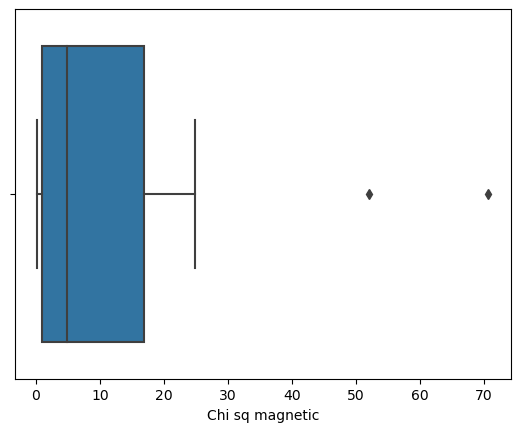

In [9]:
box = sns.boxplot(x=merged_df["Chi_sq_mag"], showfliers=True)
g = plt.gca()
plt.xlabel('Chi sq magnetic');

In [10]:
merged_df[merged_df["Chi_sq_mag"]>25]

,Element,Ion,Lambda,Vr,Vr_err,Vsini,Vsini_err,Abun,Abun_err,Chi_sq,...,Energy,Vr_mag,Vr_err_mag,Vsini_mag,Vsini_err_mag,Abun_mag,Abun_err_mag,Chi_sq_mag,Tau5000_mag,Energy_mag
5,14.0,1.0,5041.0238,-92.1950,0.0011,11.2452,0.0068,-3.3325,0.0011,15.75994,...,81191.34,-93.8624,0.0037,15.7267,0.0151,-3.0246,0.0021,51.9928,-2.5472,81191.34
7,14.0,1.0,5466.4607,-90.5222,0.0013,6.3344,0.0376,-2.1097,0.0017,4.82160,...,101023.05,-90.5490,0.0029,8.1052,0.0000,-2.0319,0.0030,70.6410,-0.4884,101023.00


In [11]:
Si_data = merged_df[merged_df["Chi_sq_mag"]<25]

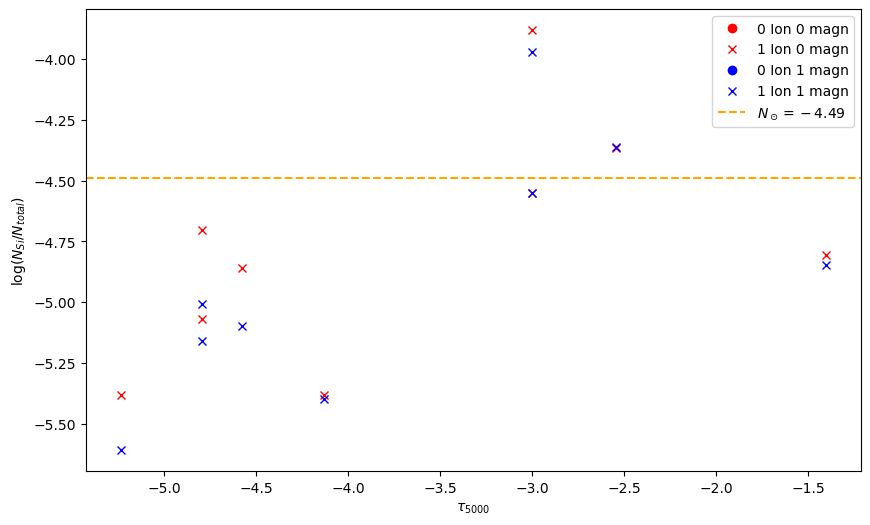

In [13]:
plt.figure(figsize=(10, 6))
#Plot without magnetic field calculations
plt.plot(Si_data[Si_data["Ion"]==0]["Tau5000"], Si_data[Si_data["Ion"]==0]["Abun"], "o", c="red", label="0 Ion 0 magn")
plt.plot(Si_data[Si_data["Ion"]==1]["Tau5000"], Si_data[Si_data["Ion"]==1]["Abun"], "x", c="red", label="1 Ion 0 magn")
#Plot with magnetic field calculations
plt.plot(Si_data[Si_data["Ion"]==0]["Tau5000_mag"], Si_data[Si_data["Ion"]==0]["Abun_mag"], "o", c="blue", label="0 Ion 1 magn")
plt.plot(Si_data[Si_data["Ion"]==1]["Tau5000_mag"], Si_data[Si_data["Ion"]==1]["Abun_mag"], "x", c="blue", label="1 Ion 1 magn")
#Add Solar abundance to the graph
plt.axhline(y=-4.49, linestyle='--', color='orange', label=r"$N_\odot=-4.49$")
plt.xlabel(r"${\tau}_{5000}$")
plt.ylabel("log($N_{Si}/N_{total}$)")
plt.legend()
plt.show()


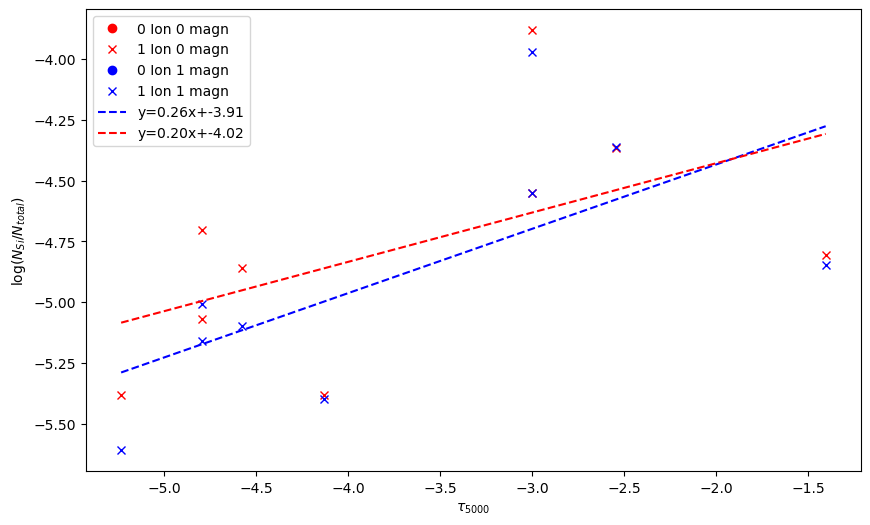

In [29]:
# Scatter plot
plt.figure(figsize=(10, 6))
#Plot without magnetic field calculations
plt.plot(Si_data[Si_data["Ion"]==0]["Tau5000"], Si_data[Si_data["Ion"]==0]["Abun"], "o", c="red", label="0 Ion 0 magn")
plt.plot(Si_data[Si_data["Ion"]==1]["Tau5000"], Si_data[Si_data["Ion"]==1]["Abun"], "x", c="red", label="1 Ion 0 magn")
#Plot with magnetic field calculations
plt.plot(Si_data[Si_data["Ion"]==0]["Tau5000_mag"], Si_data[Si_data["Ion"]==0]["Abun_mag"], "o", c="blue", label="0 Ion 1 magn")
plt.plot(Si_data[Si_data["Ion"]==1]["Tau5000_mag"], Si_data[Si_data["Ion"]==1]["Abun_mag"], "x", c="blue", label="1 Ion 1 magn")

# Linear approximation for subset
x_mag = Si_data["Tau5000_mag"]
y_mag = Si_data["Abun_mag"]
coefficients_mag = np.polyfit(x_mag, y_mag, deg=1)
x_approx_mag = np.linspace(x_mag.min(), x_mag.max(), 100)
y_approx_mag = np.polyval(coefficients_mag, x_approx_mag)
plt.plot(x_approx_mag, y_approx_mag, "--", c="blue", label=f"y={coefficients_mag[0]:.2f}x+{coefficients_mag[1]:.2f}")

x = Si_data["Tau5000"]
y = Si_data["Abun"]
coefficients = np.polyfit(x, y, deg=1)
x_approx = np.linspace(x.min(), x.max(), 100)
y_approx = np.polyval(coefficients, x_approx)
plt.plot(x_approx, y_approx, "--", c="red", label=f"y={coefficients[0]:.2f}x+{coefficients[1]:.2f}")


#Add Solar abundance to the graph
plt.axhline(y=-4.49, linestyle='--', color='orange', label=r"$N_\odot=-4.49$")

# Axis labels, legend and show
plt.xlabel(r"${\tau}_{5000}$")
plt.ylabel("log($N_{Si}/N_{total}$)")
plt.legend()
plt.show()


In [30]:
Si_data[Si_data["Tau5000"]>-1.5]

,Element,Ion,Lambda,Vr,Vr_err,Vsini,Vsini_err,Abun,Abun_err,Chi_sq,...,Energy,Vr_mag,Vr_err_mag,Vsini_mag,Vsini_err_mag,Abun_mag,Abun_err_mag,Chi_sq_mag,Tau5000_mag,Energy_mag
4,14.0,1.0,4130.8715,-88.1133,0.003,8.5885,0.0679,-4.8047,0.0046,0.89811,...,79355.02,-88.1535,0.0063,8.4863,0.0702,-4.8486,0.0076,8.82547,-1.4054,79355.02
